In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
# Elimina las columnas 'Destino Turístico' y 'CUT Destino Turístico'
data = pd.read_csv('../data/processed/df_listo_para_segmentar.csv',sep=';')
data = data.drop(columns=['Destino Turistico', 'CUT Destino Turistico','Norte a Sur Origen', 'Norte a Sur Destino','CUT Comuna Origen','Comuna Origen', 'CUT Provincia Origen',
       'Provincia Origen','CUT Provincia Destino','Provincia Destino'])

total_combinaciones_viajes = data.groupby(['CUT Region Origen', 'Region Origen',
       'CUT Comuna Destino', 'Comuna Destino',
       'CUT Region Destino', 'Region Destino', 'Anio', 'CUT Mes', 'Mes',
       'CUT Temporada', 'Temporada', 'PIB Region Origen',
       'PIB Region Destino'])['Viajes Ocasionales'].sum().reset_index()
total_combinaciones_viajes.sort_values(by='Viajes Ocasionales')

,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
9252,1,Tarapacá,9105,Freire,9,La Araucanía,2019,7,julio,0,Baja,1180.893537,1249.601827,1
46271,3,Atacama,10306,San Juan de la Costa,10,Los Lagos,2023,12,diciembre,1,Alta,1070.271071,1858.084950,1
10064,1,Tarapacá,9208,Purén,9,La Araucanía,2022,3,marzo,0,Baja,1173.454337,1519.086587,1
59468,4,Coquimbo,8104,Florida,8,Biobío,2021,9,septiembre,0,Baja,1523.827879,2851.153384,1
10062,1,Tarapacá,9208,Purén,9,La Araucanía,2022,1,enero,1,Alta,1173.454337,1519.086587,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219541,13,Metropolitana de Santiago,5604,El Quisco,5,Valparaíso,2019,2,febrero,1,Alta,19454.387194,3408.549930,136741
218299,13,Metropolitana de Santiago,5109,Viña del Mar,5,Valparaíso,2020,2,febrero,1,Alta,19171.861138,3393.913572,139733
219607,13,Metropolitana de Santiago,5605,El Tabo,5,Valparaíso,2019,2,febrero,1,Alta,19454.387194,3408.549930,152802
219619,13,Metropolitana de Santiago,5605,El Tabo,5,Valparaíso,2020,2,febrero,1,Alta,19171.861138,3393.913572,160172


In [81]:
total_combinaciones_viajes.describe()

,CUT Region Origen,CUT Comuna Destino,CUT Region Destino,Anio,CUT Mes,CUT Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
count,290154.000000,290154.000000,290154.000000,290154.000000,290154.000000,290154.000000,290154.000000,290154.000000,290154.000000
mean,8.418330,9079.708493,8.844021,2021.289067,6.268668,0.345296,3120.423549,5325.081959,583.825103
std,4.549765,3793.104300,3.823877,1.577257,3.444299,0.475465,5059.826828,7171.046524,2641.584101
min,1.000000,1101.000000,1.000000,2019.000000,1.000000,0.000000,269.757533,269.757533,1.000000
25%,5.000000,6108.000000,6.000000,2020.000000,3.000000,0.000000,812.578681,1473.898153,18.000000
50%,8.000000,8312.000000,8.000000,2021.000000,6.000000,0.000000,1575.850982,1985.679810,76.000000
75%,13.000000,13110.000000,13.000000,2023.000000,9.000000,1.000000,3015.430837,3667.862189,352.000000
max,16.000000,16305.000000,16.000000,2024.000000,12.000000,1.000000,22613.088769,22613.088769,162415.000000


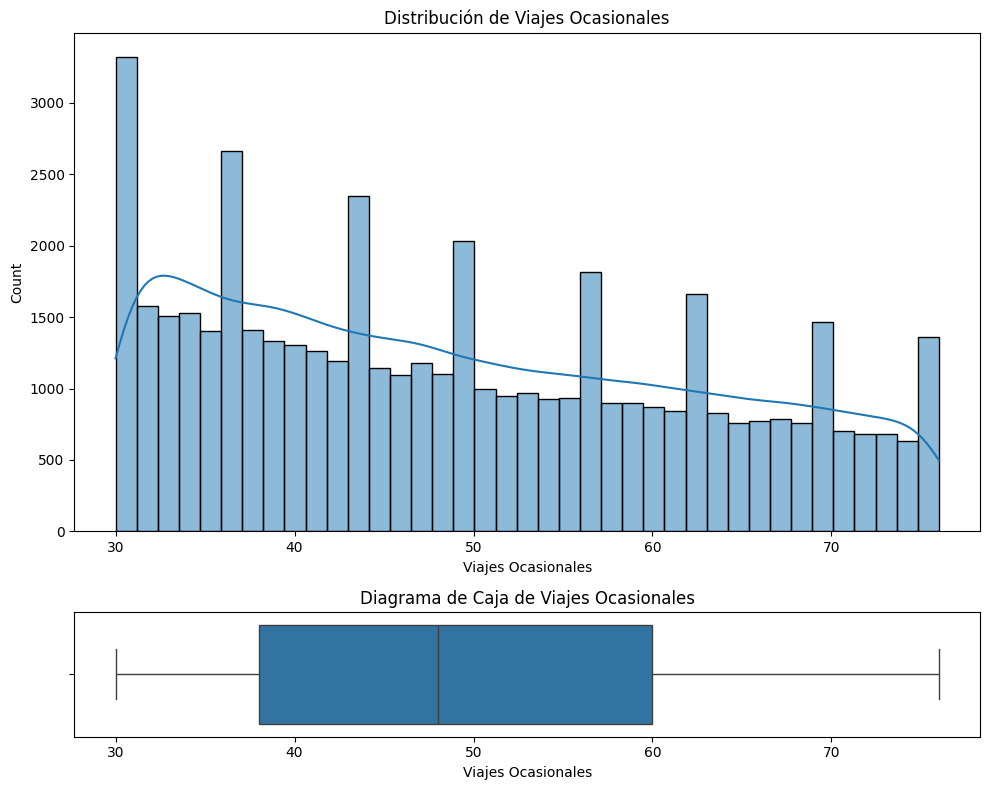

In [82]:
total_combinaciones_viajes = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']>=30) & (total_combinaciones_viajes['Viajes Ocasionales']<=76) ]

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()


In [83]:
df_num = total_combinaciones_viajes.drop([ 'Region Origen', 'Comuna Destino', 'Region Destino', 'Mes', 'Temporada'],axis=1)
df_num

,CUT Region Origen,CUT Comuna Destino,CUT Region Destino,Anio,CUT Mes,CUT Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
203,1,1402,1,2019,6,0,1115.801838,1115.801838,66
261,1,1402,1,2024,4,0,1261.026700,1261.026700,70
599,1,2103,2,2019,6,0,1115.801838,3894.124564,75
662,1,2104,2,2019,3,0,1061.580205,3724.530431,38
670,1,2104,2,2019,11,0,1202.639412,4279.561800,75
...,...,...,...,...,...,...,...,...,...
289689,16,16205,16,2024,4,0,801.797197,801.797197,49
289773,16,16207,16,2020,4,0,636.131114,636.131114,52
289775,16,16207,16,2020,6,0,636.131114,636.131114,76
289910,16,16302,16,2020,9,1,634.974381,634.974381,72


In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

X = df_num.drop('Viajes Ocasionales',axis=1)
y = df_num['Viajes Ocasionales']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X_train

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=6)
X_train = selector.fit_transform(X_train, y_train)

# Transformación a los datos de test
X_test = selector.transform(X_test)

# Obtener las columnas seleccionadas
selected_features = selector.get_support(indices=True)
best_columns = X.columns[selected_features]
print("Columnas seleccionadas:", best_columns)

# Escalado de datos: SVM es sensible a la escala de los datos, por lo que es útil escalarlos
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

Columnas seleccionadas: Index(['CUT Region Origen', 'CUT Comuna Destino', 'CUT Region Destino',
       'CUT Temporada', 'PIB Region Origen', 'PIB Region Destino'],
      dtype='object')


In [89]:

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)
print(f'El MAE es: {mean_absolute_error(y_test, y_pred)}')
print(f'El MSE es: {mean_squared_error(y_test, y_pred)}')
print(f'El RMSE es: {root_mean_squared_error(y_test, y_pred)}')
print(f'El R2 es: {r2_score(y_test, y_pred)}')

El MAE es: 10.374210200986196
El MSE es: 163.881155455335
El RMSE es: 12.801607534030053
El R2 es: 0.10262787684268948
